In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927485 entries, 0 to 15927484
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   fl_date             object 
 1   mkt_unique_carrier  object 
 2   origin              object 
 3   dest                object 
 4   arr_delay           float64
 5   cancelled           int64  
 6   distance            int64  
 7   weather_delay       float64
 8   month               int64  
 9   month_day           int64  
 10  week_day            int64  
 11  dep_hour            float64
 12  arr_hour            float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.5+ GB


In [12]:
print(df.columns)

Index(['fl_date', 'mkt_unique_carrier', 'origin', 'dest', 'arr_delay',
       'cancelled', 'distance', 'weather_delay', 'month', 'month_day',
       'week_day', 'dep_hour', 'arr_hour'],
      dtype='object')


In [13]:
df.isnull().sum()

fl_date                      0
mkt_unique_carrier           0
origin                       0
dest                         0
arr_delay               311744
cancelled                    0
distance                     0
weather_delay         12918001
month                        0
month_day                    0
week_day                     0
dep_hour                  2568
arr_hour                 48937
dtype: int64

In [4]:
df_cancelled = df[df['cancelled']==1]
df_non_cancelled=df[df['cancelled']==0]


In [5]:
# # Shuffle the data in the DataFrame and create a balanced sample for cancelled flights
sample_size = len(df_cancelled)
df_cancelled = df_cancelled.sample(n=sample_size, random_state=42)
df_non_cancelled= df_non_cancelled.sample(n=sample_size, random_state=42)
df= pd.concat([df_cancelled,df_non_cancelled])
# # Reset the index of the shuffled sample
df.reset_index(drop=True, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538416 entries, 0 to 538415
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             538416 non-null  object 
 1   mkt_unique_carrier  538416 non-null  object 
 2   origin              538416 non-null  object 
 3   dest                538416 non-null  object 
 4   arr_delay           268457 non-null  float64
 5   cancelled           538416 non-null  int64  
 6   distance            538416 non-null  int64  
 7   weather_delay       51982 non-null   float64
 8   month               538416 non-null  int64  
 9   month_day           538416 non-null  int64  
 10  week_day            538416 non-null  int64  
 11  dep_hour            538344 non-null  float64
 12  arr_hour            536579 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 53.4+ MB


In [6]:
df=df.fillna(0)

In [18]:
df.head()

,fl_date,mkt_unique_carrier,origin,dest,arr_delay,cancelled,distance,weather_delay,month,month_day,week_day,dep_hour,arr_hour
0,2018-07-24,DL,BNA,JFK,0.0,1,765,0.0,7,24,1,10.0,13.0
1,2019-01-13,B6,DCA,FLL,0.0,1,899,0.0,1,13,6,10.0,13.0
2,2018-03-13,AA,PWM,PHL,0.0,1,364,0.0,3,13,1,10.0,12.0
3,2018-03-06,AA,SWF,PHL,0.0,1,127,0.0,3,6,1,14.0,16.0
4,2019-02-13,WN,HOU,SLC,0.0,1,1214,0.0,2,13,2,7.0,9.0


In [19]:
df.head()


,fl_date,mkt_unique_carrier,origin,dest,arr_delay,cancelled,distance,weather_delay,month,month_day,week_day,dep_hour,arr_hour
0,2018-07-24,DL,BNA,JFK,0.0,1,765,0.0,7,24,1,10.0,13.0
1,2019-01-13,B6,DCA,FLL,0.0,1,899,0.0,1,13,6,10.0,13.0
2,2018-03-13,AA,PWM,PHL,0.0,1,364,0.0,3,13,1,10.0,12.0
3,2018-03-06,AA,SWF,PHL,0.0,1,127,0.0,3,6,1,14.0,16.0
4,2019-02-13,WN,HOU,SLC,0.0,1,1214,0.0,2,13,2,7.0,9.0


In [7]:


x= df.groupby('mkt_unique_carrier')['weather_delay'].mean()
df['weather_delay_carrier_mean']= (df['mkt_unique_carrier'].map(x)).round(2)
df=df.drop(['weather_delay'],axis=1)


In [8]:
df['origin-dest']=df['origin']+'-'+df['dest']
x= df.groupby('origin-dest')['cancelled'].mean()
df['origin-dest-mean']= (df['origin-dest'].map(x)).round(2)
df=df.drop(['origin','dest'],axis=1)

In [9]:
df['month']=df['month'].astype(str)
df['month_carrier']=df['mkt_unique_carrier']+'-'+df['month']
x= df.groupby('month_carrier')['cancelled'].mean()
df['month_carrier_mean']= (df['month_carrier'].map(x)).round(2)
df=df.drop(['month_carrier','mkt_unique_carrier','month'],axis=1)

In [23]:
df.head()

,fl_date,arr_delay,cancelled,distance,month_day,week_day,dep_hour,arr_hour,weather_delay_carrier_mean,origin-dest,origin-dest-mean,month_carrier_mean
0,2018-07-24,0.0,1,765,24,1,10.0,13.0,0.75,BNA-JFK,0.70,0.36
1,2019-01-13,0.0,1,899,13,6,10.0,13.0,0.20,DCA-FLL,0.39,0.55
2,2018-03-13,0.0,1,364,13,1,10.0,12.0,0.34,PWM-PHL,0.67,0.64
3,2018-03-06,0.0,1,127,6,1,14.0,16.0,0.34,SWF-PHL,0.77,0.64
4,2019-02-13,0.0,1,1214,13,2,7.0,9.0,0.11,HOU-SLC,0.67,0.67


In [10]:
df=df.drop(['fl_date','origin-dest','distance','arr_hour','arr_delay'],axis=1)

In [11]:
df.head()

,cancelled,month_day,week_day,dep_hour,weather_delay_carrier_mean,origin-dest-mean,month_carrier_mean
0,1,24,1,10.0,0.75,0.70,0.36
1,1,13,6,10.0,0.20,0.39,0.55
2,1,13,1,10.0,0.34,0.67,0.64
3,1,6,1,14.0,0.34,0.77,0.64
4,1,13,2,7.0,0.11,0.67,0.67


In [12]:
dummies = ['week_day','month_day','dep_hour'] 

for i in dummies:
    df = pd.concat([df, pd.get_dummies(df[i], prefix=i,dtype=float)], axis=1)
    df = df.drop([i], axis=1)

In [13]:
df.head()

,cancelled,weather_delay_carrier_mean,origin-dest-mean,month_carrier_mean,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,...,dep_hour_14.0,dep_hour_15.0,dep_hour_16.0,dep_hour_17.0,dep_hour_18.0,dep_hour_19.0,dep_hour_20.0,dep_hour_21.0,dep_hour_22.0,dep_hour_23.0
0,1,0.75,0.70,0.36,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.20,0.39,0.55,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.34,0.67,0.64,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.34,0.77,0.64,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.11,0.67,0.67,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
# Scale features since weight magnitudes will effect regularization weight penalties
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled.head()

,cancelled,weather_delay_carrier_mean,origin-dest-mean,month_carrier_mean,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,...,dep_hour_14.0,dep_hour_15.0,dep_hour_16.0,dep_hour_17.0,dep_hour_18.0,dep_hour_19.0,dep_hour_20.0,dep_hour_21.0,dep_hour_22.0,dep_hour_23.0
0,1.0,1.862871,1.018343,-0.954997,-0.420805,2.393292,-0.437007,-0.418058,-0.40816,-0.350013,...,-0.251971,-0.258387,-0.255009,-0.280882,-0.270919,-0.254938,-0.235018,-0.188734,-0.170305,-0.076012
1,1.0,-0.816237,-0.559860,0.334762,-0.420805,-0.417835,-0.437007,-0.418058,-0.40816,-0.350013,...,-0.251971,-0.258387,-0.255009,-0.280882,-0.270919,-0.254938,-0.235018,-0.188734,-0.170305,-0.076012
2,1.0,-0.134282,0.865614,0.945700,-0.420805,2.393292,-0.437007,-0.418058,-0.40816,-0.350013,...,-0.251971,-0.258387,-0.255009,-0.280882,-0.270919,-0.254938,-0.235018,-0.188734,-0.170305,-0.076012
3,1.0,-0.134282,1.374712,0.945700,-0.420805,2.393292,-0.437007,-0.418058,-0.40816,-0.350013,...,3.968708,-0.258387,-0.255009,-0.280882,-0.270919,-0.254938,-0.235018,-0.188734,-0.170305,-0.076012
4,1.0,-1.254636,0.865614,1.149346,-0.420805,-0.417835,2.288293,-0.418058,-0.40816,-0.350013,...,-0.251971,-0.258387,-0.255009,-0.280882,-0.270919,-0.254938,-0.235018,-0.188734,-0.170305,-0.076012


Predicting cancellation

In [15]:
from sklearn.utils import shuffle
X, y = df.drop(['cancelled'],axis=1), df['cancelled']

X, y = shuffle(X, y, random_state=27)

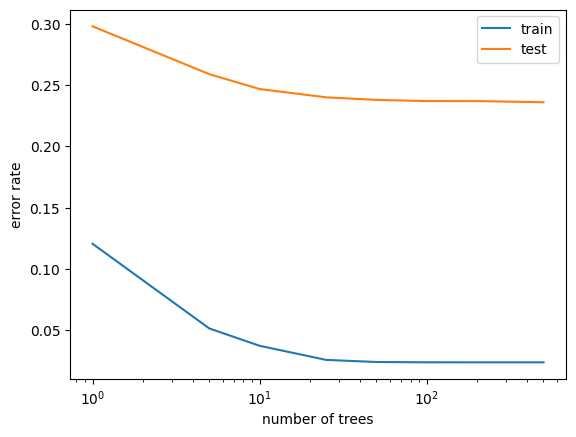

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report

# # Step 1: Gather and prepare your data
# # Assume you have X as your feature matrix and y as your target variable

# # Step 2: Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Plots training error and testing error, using various amounts of trees in the random forest.
# def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
#     train_err = []
#     test_err = []
#     for ntree in num_trees:
#         model = RandomForestClassifier(n_estimators=ntree)
#         model.fit(X_train, y_train)
#         train_err.append(1-model.score(X_train, y_train))
#         test_err.append(1-model.score(X_test, y_test))

#     fig, ax = plt.subplots()
#     ax.plot(num_trees,train_err,label="train")
#     ax.plot(num_trees,test_err,label="test")
#     ax.set_xlabel('number of trees');
#     ax.set_ylabel('error rate');
#     ax.set_xscale('log')
#     ax.legend()
#     plt.show()

# #fit a random forest for various n_estimators and plot the error
# make_num_tree_plot(X_train, y_train, X_test, y_test, (1,5,10,25,50,100,200,500))

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9496043943797999
Testing Accuracy: 0.7394970469150477


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     53825
           1       0.74      0.74      0.74     53859

    accuracy                           0.74    107684
   macro avg       0.74      0.74      0.74    107684
weighted avg       0.74      0.74      0.74    107684



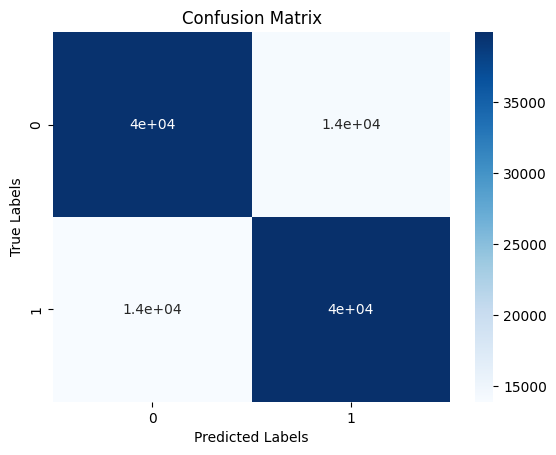

[6.59161868e-02 3.58366585e-01 1.78400205e-01 1.21312750e-02
 1.27437722e-02 6.17186419e-03 1.19831683e-02 1.08420321e-02
 6.10384965e-03 1.18009798e-02 4.79234579e-03 5.00419578e-03
 5.64568859e-03 5.08828024e-03 3.83728710e-03 4.52054346e-03
 6.13994363e-03 5.11887519e-03 6.41875365e-03 6.45713670e-03
 6.11987006e-03 5.82810099e-03 5.88341038e-03 4.56856049e-03
 6.07326238e-03 6.65552735e-03 5.64094478e-03 6.22812126e-03
 5.02707592e-03 4.47049666e-03 7.16295907e-03 6.41576295e-03
 4.68614233e-03 5.10363271e-03 4.80153380e-03 4.93300477e-03
 6.01630240e-03 6.53110975e-03 5.51462774e-03 5.43330020e-03
 4.00192001e-03 7.41005955e-05 1.40205667e-04 2.02681750e-04
 2.92292168e-04 1.79945055e-04 6.75781080e-03 1.21082962e-02
 9.96111790e-03 9.76386856e-03 7.80788270e-03 8.49594210e-03
 8.40343865e-03 8.92731072e-03 8.74488315e-03 9.77091493e-03
 8.98456578e-03 9.20565009e-03 8.26696084e-03 6.91047344e-03
 7.25310125e-03 7.72164831e-03 6.53100337e-03 6.82094527e-03
 2.09632679e-03]


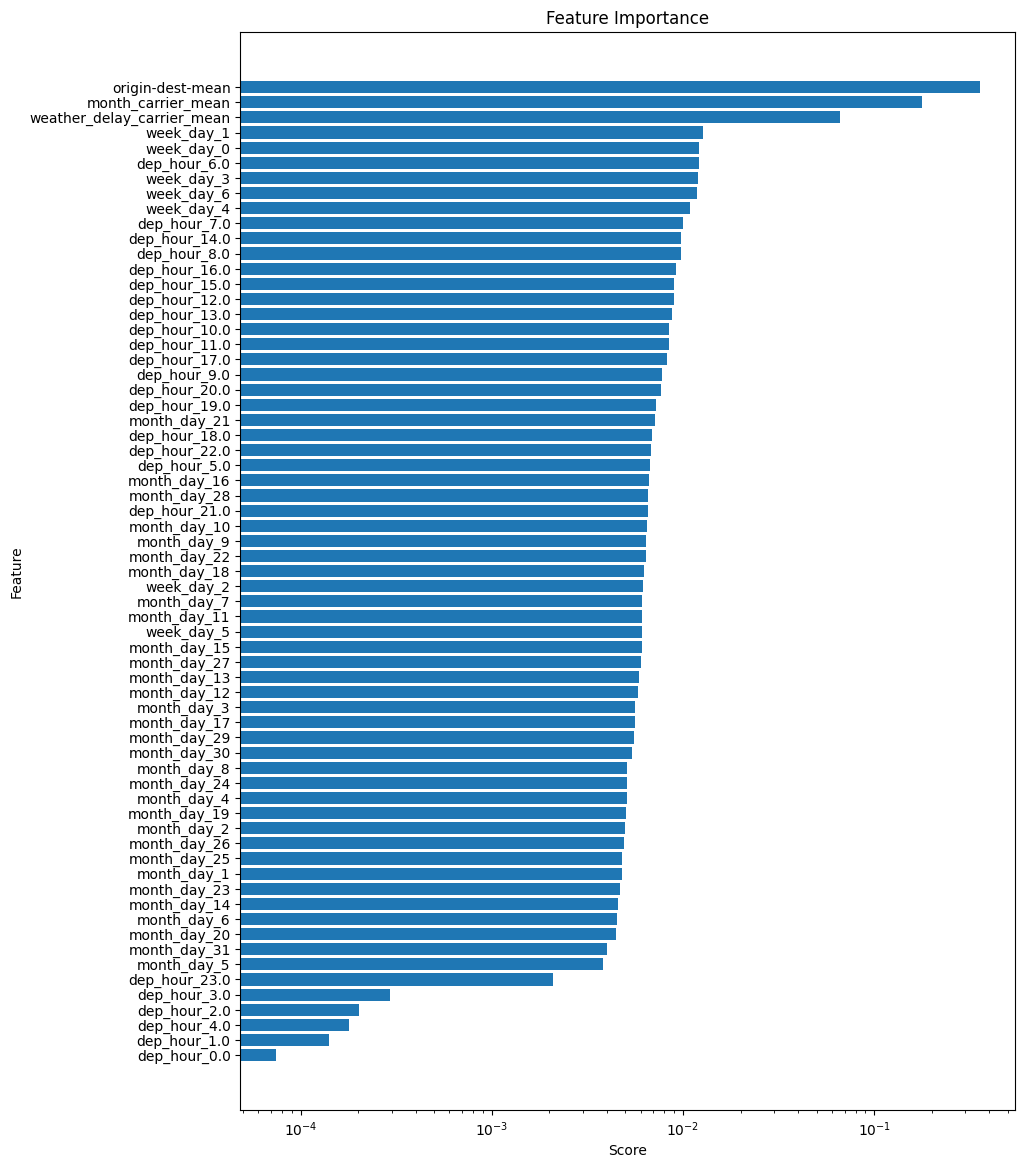

In [17]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# #feature importance score and plot them
feature_importance = model.feature_importances_
print(feature_importance)

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 14))

# Sort the feature importance scores and corresponding feature names
sorted_indices = np.argsort(feature_importance)
sorted_features = X_train.columns[sorted_indices]
sorted_scores = feature_importance[sorted_indices]

plt.barh(sorted_features, sorted_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Change the x-axis scale to logarithmic
plt.xscale('log')

plt.show()

plt.show()

In [18]:
# Historical data for delays

hist_data= pd.read_csv('hist_data.csv')

hist_data.head()

,mkt_unique_carrier,weather_delay_carrier_mean,month_carrier_mean,origin-dest,origin-dest-mean
0,AS,1.4,0.01,PAE-LAX,0.01
1,AS,1.4,0.01,LAX-PAE,0.01
2,AS,1.4,0.01,PAE-PDX,0.02
3,AS,1.4,0.01,PDX-PAE,0.01
4,AS,1.4,0.01,PAE-PDX,0.02


In [19]:
#Reading Unseen data
ftest= pd.read_csv('Flight_test.csv',usecols=[0,1,9,12,14,15])
ftest.head()

,fl_date,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time
0,2020-01-01 00:00:00,WN,ONT,SFO,1810,1945
1,2020-01-01 00:00:00,WN,ONT,SFO,1150,1320
2,2020-01-01 00:00:00,WN,ONT,SJC,2020,2130
3,2020-01-01 00:00:00,WN,ONT,SJC,1340,1455
4,2020-01-01 00:00:00,WN,ONT,SJC,915,1035


In [20]:
# Preparing the X_final file with engineering features:
ftest['month'] = pd.DatetimeIndex(ftest['fl_date']).month
ftest['month_day'] = pd.DatetimeIndex(ftest['fl_date']).day
ftest['week_day'] = pd.DatetimeIndex(ftest['fl_date']).weekday
ftest['year_day'] = pd.DatetimeIndex(ftest['fl_date']).dayofyear
ftest['dep_hour'] = pd.to_datetime(ftest['crs_dep_time'], format='%H%M', errors='coerce').dt.hour
ftest['arr_hour'] = pd.to_datetime(ftest['crs_arr_time'], format='%H%M', errors='coerce').dt.hour

In [21]:
ftest.isnull().sum()


fl_date                  0
mkt_unique_carrier       0
origin                   0
dest                     0
crs_dep_time             0
crs_arr_time             0
month                    0
month_day                0
week_day                 0
year_day                 0
dep_hour               104
arr_hour              1873
dtype: int64

In [22]:
ftest=ftest.fillna(0)

In [24]:
# adding Historical data

#weather hist.
x=hist_data['weather_delay_carrier_mean']
ftest['weather_delay_carrier_mean']= (ftest['mkt_unique_carrier'].map(x)).round(2)
#Cancellation by carrier & month hist
y=hist_data['month_carrier_mean']
ftest['month']=ftest['month'].astype(str)
ftest['month_carrier']=ftest['mkt_unique_carrier']+'-'+ftest['month']
ftest['month_carrier_mean']= (ftest['month_carrier'].map(y)).round(2)
#cancellation Origin-dest hist
z=hist_data['origin-dest-mean']
ftest['origin-dest']=ftest['origin']+'-'+ftest['dest']
ftest['origin-dest-mean']= (ftest['origin-dest'].map(y)).round(2)

ftest.head()

,fl_date,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,month,month_day,week_day,year_day,dep_hour,arr_hour,weather_delay_carrier_mean,month_carrier,month_carrier_mean,origin-dest,origin-dest-mean
0,2020-01-01 00:00:00,WN,ONT,SFO,1810,1945,1,1,2,1,18.0,19.0,NaN,WN-1,NaN,ONT-SFO,NaN
1,2020-01-01 00:00:00,WN,ONT,SFO,1150,1320,1,1,2,1,11.0,13.0,NaN,WN-1,NaN,ONT-SFO,NaN
2,2020-01-01 00:00:00,WN,ONT,SJC,2020,2130,1,1,2,1,20.0,21.0,NaN,WN-1,NaN,ONT-SJC,NaN
3,2020-01-01 00:00:00,WN,ONT,SJC,1340,1455,1,1,2,1,13.0,14.0,NaN,WN-1,NaN,ONT-SJC,NaN
4,2020-01-01 00:00:00,WN,ONT,SJC,915,1035,1,1,2,1,9.0,10.0,NaN,WN-1,NaN,ONT-SJC,NaN


In [25]:
X_final=ftest[['fl_date','mkt_unique_carrier','origin','dest','month_day','week_day','dep_hour','weather_delay_carrier_mean','origin-dest-mean','month_carrier_mean']]

In [26]:
X_final=X_final.fillna(0)
X_final.head()

,fl_date,mkt_unique_carrier,origin,dest,month_day,week_day,dep_hour,weather_delay_carrier_mean,origin-dest-mean,month_carrier_mean
0,2020-01-01 00:00:00,WN,ONT,SFO,1,2,18.0,0.0,0.0,0.0
1,2020-01-01 00:00:00,WN,ONT,SFO,1,2,11.0,0.0,0.0,0.0
2,2020-01-01 00:00:00,WN,ONT,SJC,1,2,20.0,0.0,0.0,0.0
3,2020-01-01 00:00:00,WN,ONT,SJC,1,2,13.0,0.0,0.0,0.0
4,2020-01-01 00:00:00,WN,ONT,SJC,1,2,9.0,0.0,0.0,0.0


In [27]:
X_final_data=X_final.drop(['fl_date','mkt_unique_carrier','origin','dest'],axis=1)
X_final_data.head()

,month_day,week_day,dep_hour,weather_delay_carrier_mean,origin-dest-mean,month_carrier_mean
0,1,2,18.0,0.0,0.0,0.0
1,1,2,11.0,0.0,0.0,0.0
2,1,2,20.0,0.0,0.0,0.0
3,1,2,13.0,0.0,0.0,0.0
4,1,2,9.0,0.0,0.0,0.0


In [29]:
dummies = ['week_day','month_day','dep_hour'] 

for i in dummies:
    X_final_data = pd.concat([X_final_data, pd.get_dummies(X_final_data[i], prefix=i,dtype=float)], axis=1)
    X_final_data = X_final_data.drop([i], axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
# Scale features since weight magnitudes will effect regularization weight penalties
scaler = StandardScaler().set_output(transform='pandas')
X_final_data_scaled = scaler.fit_transform(X_final_data)
X_final_data_scaled.head()

,weather_delay_carrier_mean,origin-dest-mean,month_carrier_mean,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,...,dep_hour_14.0,dep_hour_15.0,dep_hour_16.0,dep_hour_17.0,dep_hour_18.0,dep_hour_19.0,dep_hour_20.0,dep_hour_21.0,dep_hour_22.0,dep_hour_23.0
0,0.0,0.0,0.0,-0.396064,-0.380308,2.296216,-0.453512,-0.453886,-0.348184,-0.384996,...,-0.253369,-0.253197,-0.249585,-0.266819,4.001326,-0.239626,-0.221783,-0.179473,-0.152838,-0.083393
1,0.0,0.0,0.0,-0.396064,-0.380308,2.296216,-0.453512,-0.453886,-0.348184,-0.384996,...,-0.253369,-0.253197,-0.249585,-0.266819,-0.249917,-0.239626,-0.221783,-0.179473,-0.152838,-0.083393
2,0.0,0.0,0.0,-0.396064,-0.380308,2.296216,-0.453512,-0.453886,-0.348184,-0.384996,...,-0.253369,-0.253197,-0.249585,-0.266819,-0.249917,-0.239626,4.508911,-0.179473,-0.152838,-0.083393
3,0.0,0.0,0.0,-0.396064,-0.380308,2.296216,-0.453512,-0.453886,-0.348184,-0.384996,...,-0.253369,-0.253197,-0.249585,-0.266819,-0.249917,-0.239626,-0.221783,-0.179473,-0.152838,-0.083393
4,0.0,0.0,0.0,-0.396064,-0.380308,2.296216,-0.453512,-0.453886,-0.348184,-0.384996,...,-0.253369,-0.253197,-0.249585,-0.266819,-0.249917,-0.239626,-0.221783,-0.179473,-0.152838,-0.083393


In [35]:
# Make predictions on the testing data
y_final_pred = model.predict(X_final_data_scaled)
# Convert y_final_pred to a pandas Series
y_final_pred_series = pd.Series(y_final_pred)
X_final['predicted_cancellation']=y_final_pred_series

In [36]:
X_final.head()

,fl_date,mkt_unique_carrier,origin,dest,month_day,week_day,dep_hour,weather_delay_carrier_mean,origin-dest-mean,month_carrier_mean,predicted_cancellation
0,2020-01-01 00:00:00,WN,ONT,SFO,1,2,18.0,0.0,0.0,0.0,0
1,2020-01-01 00:00:00,WN,ONT,SFO,1,2,11.0,0.0,0.0,0.0,0
2,2020-01-01 00:00:00,WN,ONT,SJC,1,2,20.0,0.0,0.0,0.0,0
3,2020-01-01 00:00:00,WN,ONT,SJC,1,2,13.0,0.0,0.0,0.0,0
4,2020-01-01 00:00:00,WN,ONT,SJC,1,2,9.0,0.0,0.0,0.0,0


In [37]:
X_final['predicted_cancellation'].sum()

0

In [40]:
X_final['mkt_unique_carrier'].value_counts()

mkt_unique_carrier
AA    172420
DL    143649
UA    128306
WN    109770
AS     36197
B6     24709
NK     17477
F9     12467
HA      7787
G4      7774
Name: count, dtype: int64